# Data Setup

In this notebook, we demonstrate how to:
- setup time series data for this tutorial
- visualize the data

The data in this example is taken from the GEFCom2014 forecasting competition<sup>1</sup>. It consists of 3 years of hourly electricity load and temperature values between 2012 and 2014. 

<sup>1</sup>Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli and Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Download the data. 

(Note: The following code is designed to run on an Azure Notebook (or Unix-like environment). If you are using this notebook in a different environment, you will need to mofidy the code.)

In [2]:
data_dir = './data'

# If data not downloaded, do so
if not os.path.exists(os.path.join(data_dir, 'GEFCom2014.zip')):
    os.makedirs(data_dir, exist_ok=True)
    # Download and move the zip file
    !wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
    !mv GEFCom2014.zip ./data
else:
    print("Nothing to do")

--2019-11-16 18:32:57--  https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip [following]
--2019-11-16 18:32:57--  https://www.dropbox.com/s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucabf218ba8f28571e6fd7098549.dl.dropboxusercontent.com/cd/0/inline/Asj79br-kKMXDAANr3cB0YwW941-BpLZkwPZvM5fgdBh7SqbnL-FLcyW7iOPtPMkVU4f9oSuHbwN5dgqwftal4vZmAegz9EUyVqOU3pmE3GDpA/file# [following]
--2019-11-16 18:32:58--  https://ucabf218ba8f28571e6fd7098549.dl.dropboxusercontent.com/cd/0/inline/Asj79br-kKMXDAANr3cB0YwW941-BpLZkwPZvM5fgdBh7SqbnL-FLcyW7iOPtPMkVU4f9oSuHbwN5dgqwftal4vZmAegz9EUyVqOU3pmE3GDpA/file
Resolving uca

Extract zip file.

In [3]:
# If not done already, extract zipped data and save as compressed csv
from common.extract_data import extract_data

if not os.path.exists(os.path.join(data_dir, 'energy.csv.gz')):
    extract_data(data_dir)
else:
    print("Nothing to do")

Load the data from csv into a Pandas dataframe

In [4]:
energy = pd.read_csv(os.path.join(data_dir, 'energy.csv.gz'), parse_dates=['timestamp'])
# load_data(data_dir)[['load']]
energy.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


Reindex the dataframe such that the dataframe has a record for every time point
between the minimum and maximum timestamp in the time series. This helps to 
identify missing time periods in the data (there are none in this dataset).

In [5]:
energy.index = energy['timestamp']
energy = energy.reindex(pd.date_range(min(energy['timestamp']),
                                      max(energy['timestamp']),
                                      freq='H'))
energy = energy.drop('timestamp', axis=1)

# Check for missing
energy.isna().any()

load    False
temp    False
dtype: bool

Finally, save as parquet file.

In [6]:
energy.to_parquet(os.path.join(data_dir, 'energy.parquet'))

Plot all available load data (January 2012 to Dec 2014)

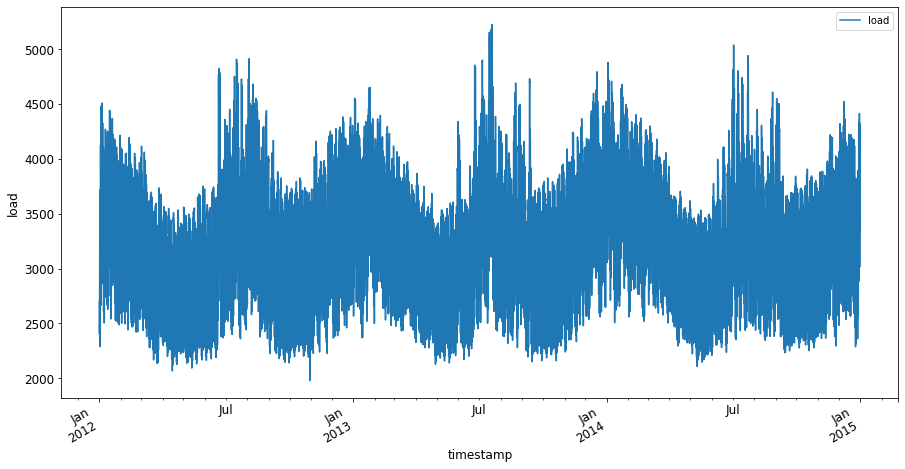

In [7]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

Plot first week of July 2014

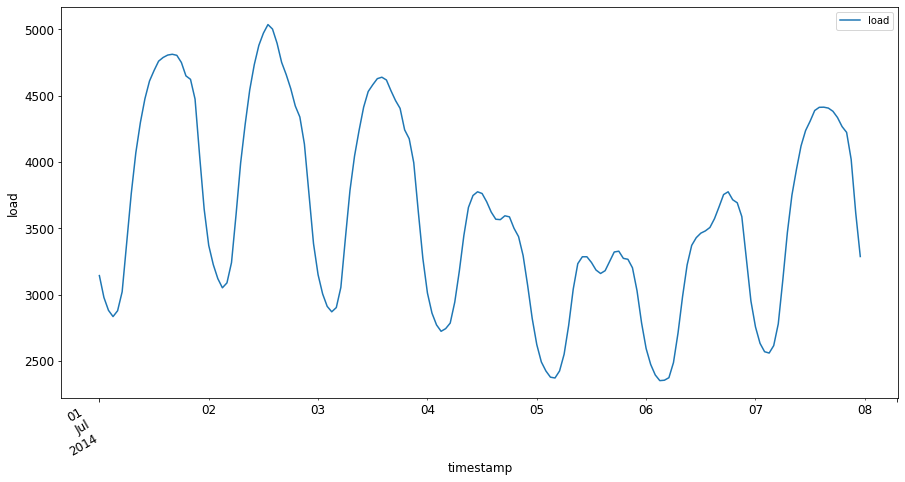

In [8]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

If you are able to run this notebook successfully and see all the visualizations, you are ready to move to next step of this tutorial. 